# An Introduction to Statistical Learning

## 2. Statistical Learning

#### 2.3 Lab: Introduction to Python

This is not an exhautive attempt at all of the coding exercises in this section. I simply picked the ones that I wanted to brush up on, or had not seen executed in the way it was detailed in the book before.

#### 2.3.3 Introduction to Numerical Python

In [1]:
import numpy as np

In [27]:
np.random.normal(size=50)

array([-1.7609291 ,  1.36744613,  0.15963204,  2.40676105, -0.57212868,
        0.28814683,  0.4104428 ,  1.96741317, -1.34935558, -1.76221613,
       -1.44538829,  0.33832187,  1.07873049, -0.04376032,  0.70656796,
        2.02384994, -0.08267836,  1.29097163, -0.7470392 , -0.54611479,
       -1.48591665,  0.59706308, -1.56548591, -0.08113369, -0.62382967,
       -1.00068576,  2.64896105, -0.87565984,  0.97833653,  1.31524098,
        1.52363697, -0.88759162, -0.06662094, -0.04533653,  0.35249378,
       -2.04166193, -1.03787243,  0.50942325,  0.31350045,  0.11827162,
       -0.13258167,  0.6104195 , -0.8896796 , -1.42506487,  1.14922902,
        0.4088019 ,  0.28127291,  1.25261193,  0.51858001, -0.05258555])

By default, this generates random normal variables with mean (loc) o, and standard deviation (scale) 1.

In [28]:
x = np.random.normal(loc=5, scale=3, size=50)

In [29]:
x.mean()

5.246372430612209

In [30]:
y = x + np.random.normal(loc=50,  scale=1, size=50)

In [31]:
np.corrcoef(x,y)

array([[1.        , 0.96489184],
       [0.96489184, 1.        ]])

This function computes the correlation matrix between x and y. The off-diagonal elements give the correlation between x and y.

In [41]:
np.random.default_rng()

Generator(PCG64) at 0x10527B060

Use this function to set a random seed before generating random data so that our code yields the same results. Below, the object 'rng' essentially has all the random number generating methods found in np.random.

In [80]:
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))
rng_2 = np.random.default_rng(1303)
print(rng_2.normal(scale=5, size=2))

[ 4.09482632 -1.07485605]
[ 4.09482632 -1.07485605]


If we construct a 10x3 matrix of N(0,1) random variables we can compute its row sums.

Note: N(0,1) refers to a specific type of normal distribution in probability and statistics.
- N: Refers to the fact that it's a normal (or Gaussian) distribution
- 0: The mean of the distribution
- 1: The variance of the distribution

In [89]:
X = rng.standard_normal((10,3))

In [90]:
X

array([[ 1.88770838, -1.25903025,  0.23934975],
       [ 1.60210655, -0.06720131,  0.32707697],
       [-0.79114006,  1.09152197,  0.43289728],
       [ 0.04111163, -0.19091465,  0.48425768],
       [ 0.18601398, -0.22669671, -0.15217883],
       [ 0.587693  ,  0.75198656, -1.27796716],
       [-0.2332274 , -2.54440112,  0.68816931],
       [ 0.69341699, -0.85999024,  1.45103531],
       [ 1.61935305, -0.98232994,  1.05090806],
       [-1.23125163, -0.41753265, -0.12511702]])

Since arrays are row-major ordered, the first axis (i.e. axis=0) refers to its rows

In [91]:
X.mean(axis=0)

array([ 0.43617845, -0.47045883,  0.31184313])

This yields the same results:

In [92]:
X.mean(0)

array([ 0.43617845, -0.47045883,  0.31184313])

In [93]:
X.mean(axis=1)

array([ 0.28934262,  0.62066074,  0.2444264 ,  0.11148489, -0.06428719,
        0.0205708 , -0.6964864 ,  0.42815402,  0.56264372, -0.59130043])

#### 2.3.4 Graphics

The subplots function returns a tuple of length two: a figure object as well as the relevant axes object.

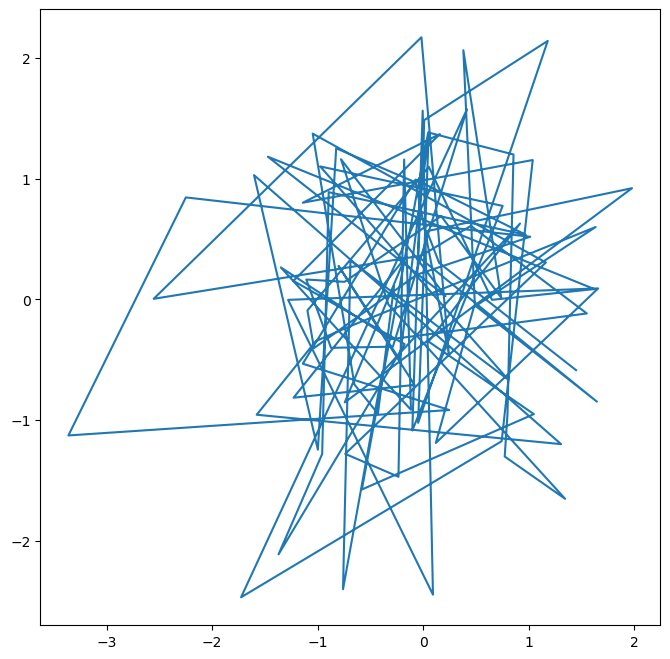

In [94]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8,8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y,);

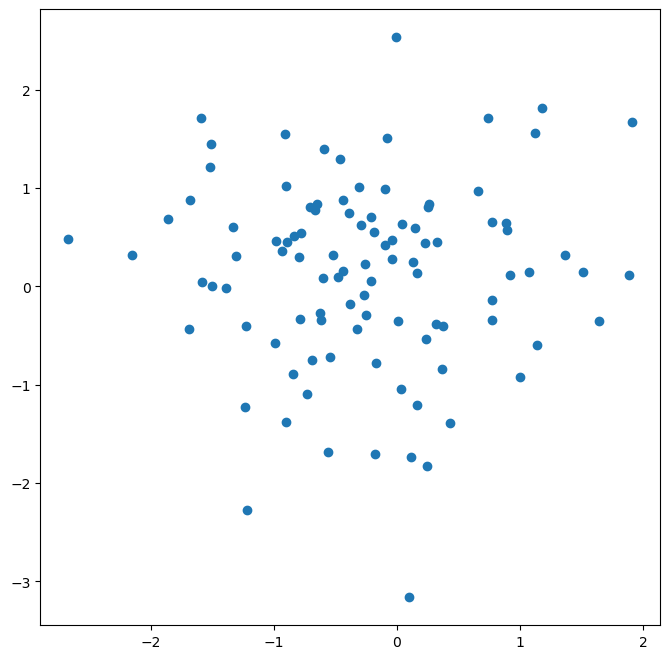

In [97]:
fig, ax = subplots(figsize=(8,8))
ax.plot(x, y, 'o');

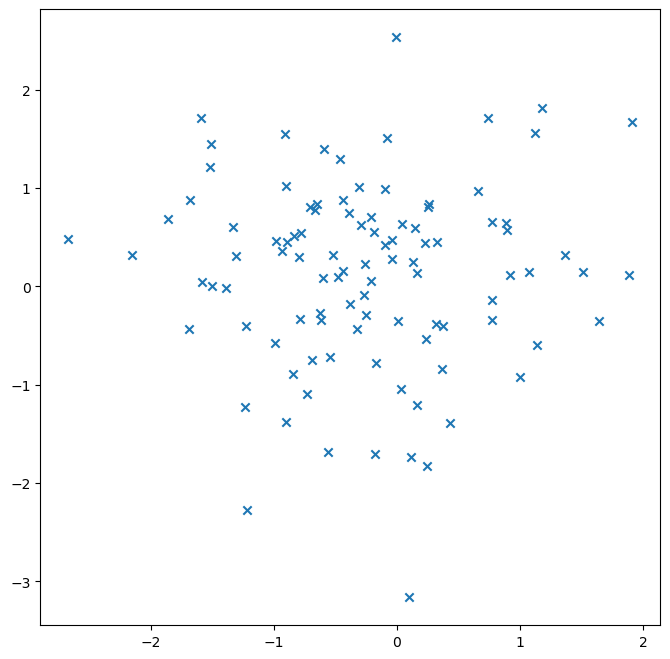

In [98]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker = 'x');

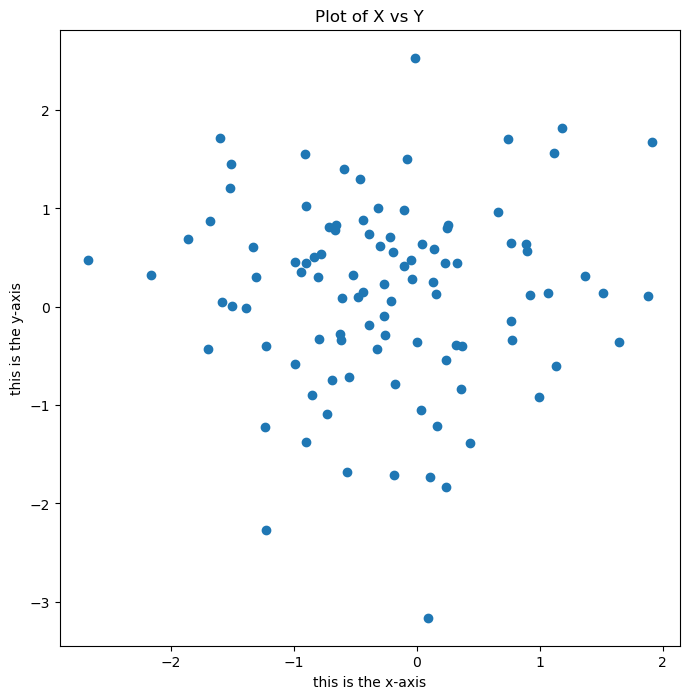

In [100]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

Having access to the object 'fig' means that we can go in and change some aspects and the redisplay it:

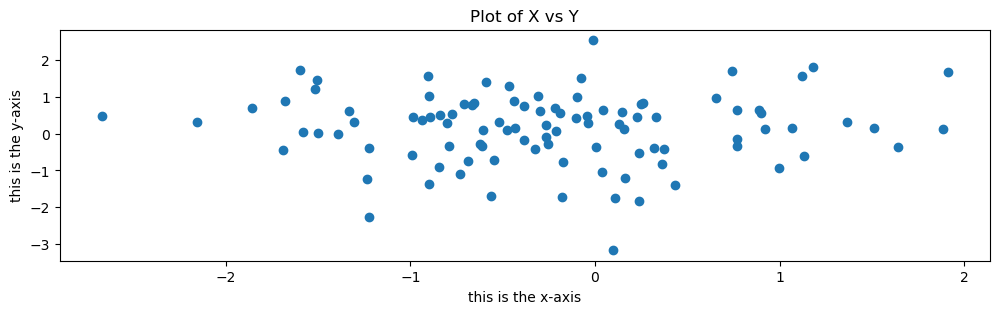

In [102]:
fig.set_size_inches(12,3)
fig

To create several plots witin a figure, we can pass additional arguments to subplots(). When doing so, there is often a relationship between the axes in the plots (e.g. all the plots may have a common x-axis). The subplots() function can automatically handle this situation when passed the keyword argument sharex=True.

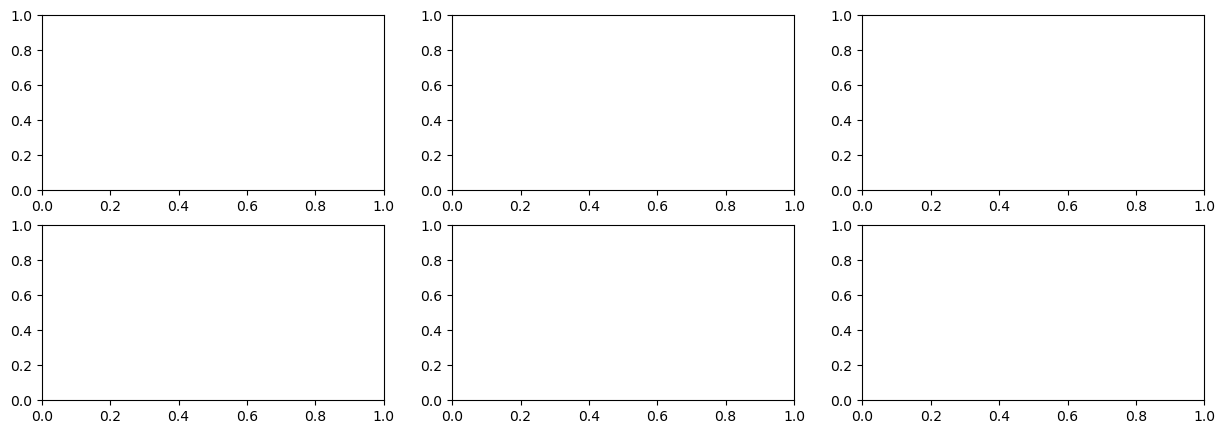

In [103]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15,5))

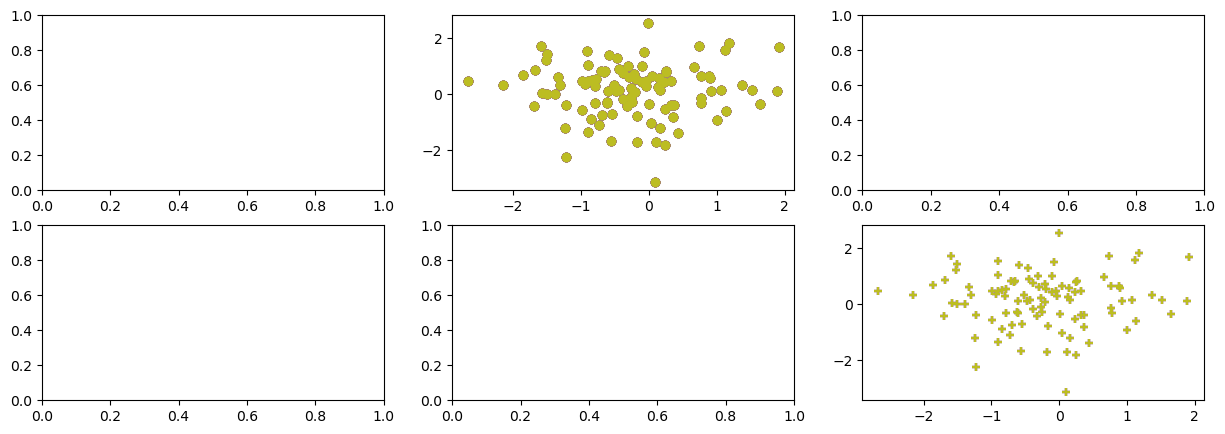

In [112]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

To save the output figure, use the savefig() method:

fig.savefig("Figure.pdf", dpi=200)

We can continue to modify 'fig' using step-by-step updates; for example, we can modify the range of the x-axis, re-save the figure and redisplay it.

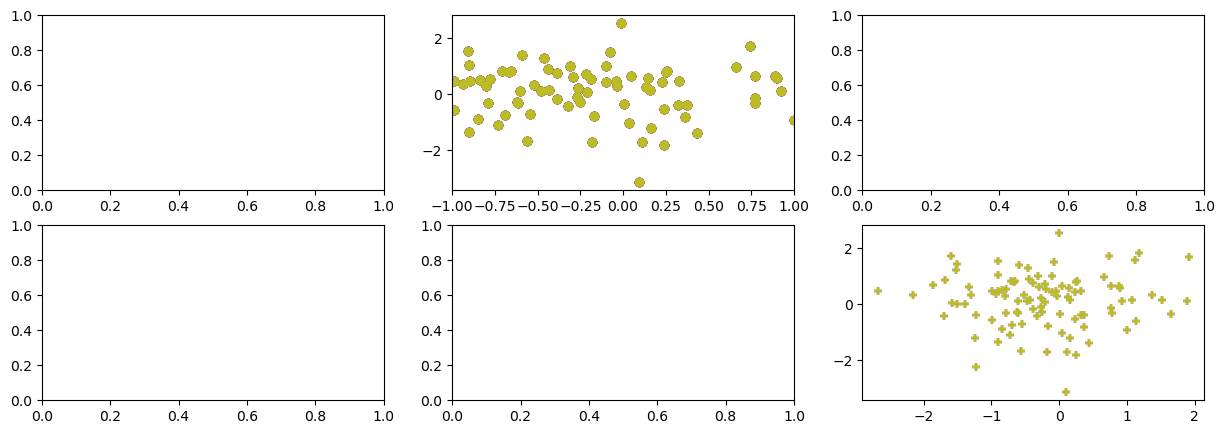

In [114]:
axes[0, 1].set_xlim([-1, 1])
#fig.savefig("Figure_updated.jpg")
fig

The ax.contour() method produces a contour plot in order to represent three-dimensional data, similar to a topographical map. It takes three arguments:

- A vector of x values (the first dimension)
- A vector of y values (the second dimension)
- A matrix whose elements correspond to the z value (the third dimension) for each pair of (x, y) coordinates

To create x and y, we can use the command np.linspace(a, b, n) which returns a vector of n numbers starting at a and ending at b.

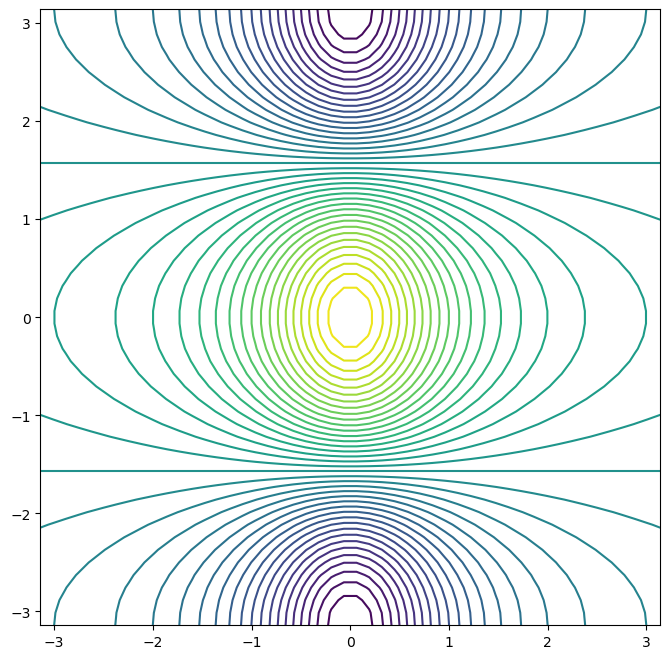

In [119]:
fig, ax = subplots(figsize=(8,8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f, levels=45);

We can increase the resoltuion by adding more levels to the image.

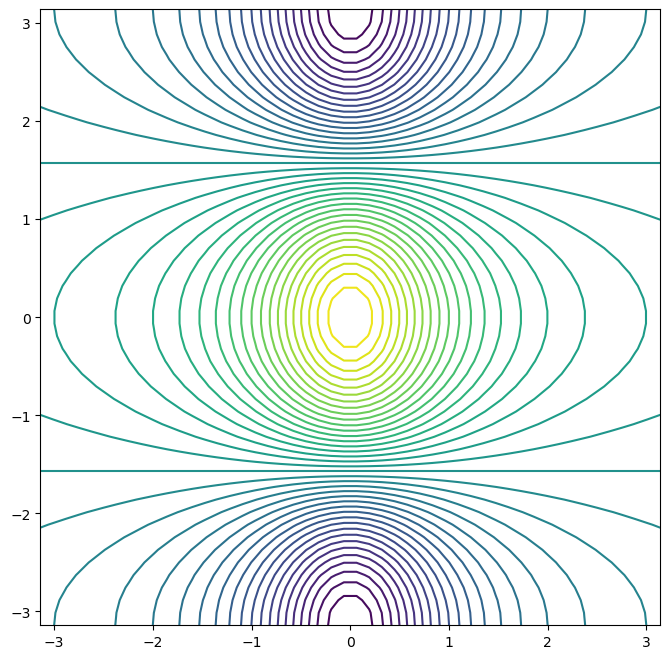

In [121]:
fig, ax = subplots(figsize=(8,8))
ax.contour(x, y, f, levels=45);

The ax.imshow() method is similar to ax.contour(), excpet that it produces a colour-coded plot whose colours depend on the z value. This is known as a heatmap, and is sometimes used to plot temperature in weather forecasts.

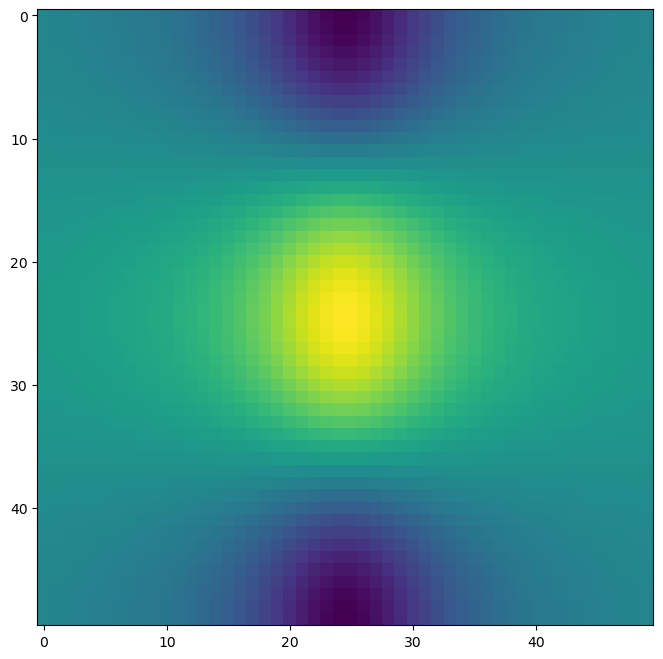

In [122]:
fig, ax = subplots(figsize=(8,8))
ax.imshow(f);